## Developing a Neural Network Regression Model
## Name:R.Subash
## reg no.212223230218

torch.Size([70, 1])


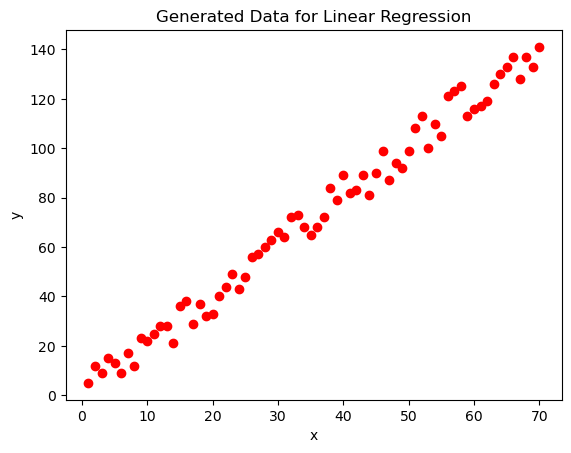

Weight: 0.10597813129425049
Bias:   0.9637961387634277
epoch:  1  loss: 5954.00195312  weight: 0.73509312  bias: 0.97723663
epoch:  2  loss: 2655.30761719  weight: 1.15417695  bias: 0.98620772
epoch:  3  loss: 1191.49755859  weight: 1.43334889  bias: 0.99220157
epoch:  4  loss: 541.92523193  weight: 1.61931860  bias: 0.99621207
epoch:  5  loss: 253.67466736  weight: 1.74320173  bias: 0.99890137
epoch:  6  loss: 125.76227570  weight: 1.82572591  bias: 1.00071061
epoch:  7  loss: 69.00058746  weight: 1.88069904  bias: 1.00193357
epoch:  8  loss: 43.81228256  weight: 1.91731894  bias: 1.00276589
epoch:  9  loss: 32.63482285  weight: 1.94171286  bias: 1.00333810
epoch: 10  loss: 27.67477417  weight: 1.95796239  bias: 1.00373697
epoch: 11  loss: 25.47373009  weight: 1.96878660  bias: 1.00402045
epoch: 12  loss: 24.49699783  weight: 1.97599685  bias: 1.00422692
epoch: 13  loss: 24.06353760  weight: 1.98079956  bias: 1.00438225
epoch: 14  loss: 23.87118340  weight: 1.98399854  bias: 1.0045033

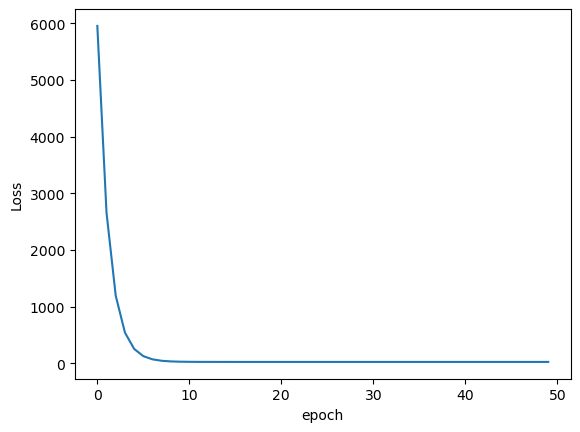

Final Weight: 1.99034309, Final Bias: 1.00654805
X range: [ 1. 70.]
Predicted Y values: [  2.996891 140.33057 ]


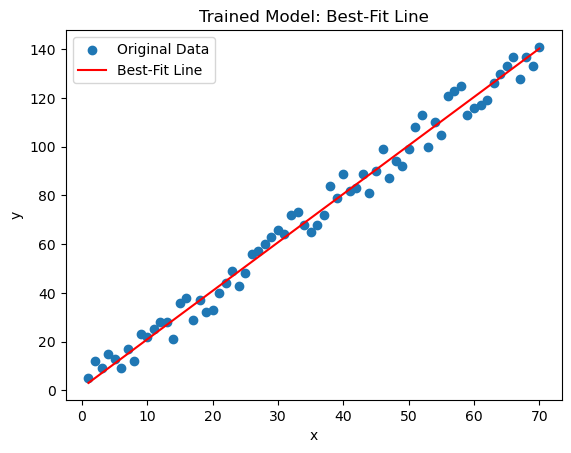

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = torch.linspace(1,70,70).reshape(-1,1)

torch.manual_seed(71)
e = torch.randint(-8,9,(70,1),dtype=torch.float)

y = 2*X + 1 + e
print(y.shape)

plt.scatter(X.numpy(), y.numpy(),color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()


torch.manual_seed(59)


class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred


torch.manual_seed(59)
model = Model(1, 1)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

loss_function = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

epochs = 50
losses = []

for epoch in range(1, epochs + 1):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_function(y_pred, y)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()


    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.linear.weight.item():10.8f}  '
          f'bias: {model.linear.bias.item():10.8f}')

plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');
plt.show()


x1 = torch.tensor([X.min().item(), X.max().item()])


w1, b1 = model.linear.weight.item(), model.linear.bias.item()


y1 = x1 * w1 + b1


print(f'Final Weight: {w1:.8f}, Final Bias: {b1:.8f}')
print(f'X range: {x1.numpy()}')
print(f'Predicted Y values: {y1.numpy()}')


plt.scatter(X.numpy(), y.numpy(), label="Original Data")
plt.plot(x1.numpy(), y1.numpy(), 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

